<a href="https://colab.research.google.com/github/briancuster/HelloCodeSchoolProject/blob/master/Algotrading_Datasources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

*Need to import some important Python libraries and methods that you will need to process financial data and perform data analysis.*

*The requests module enables you to easily download files from the web. It has a get method that takes a string of a URL to download.*

*The JavaScript Object Notation (JSON) module enables you to convert a string of JSON data into a Python dictionary via the loads method.*

*Pandas is a Python library that is built from the ground-up to do financial data analysis. It has a dataframe object that makes it easy to analyze tabular data traditionally done using spreadsheets.*

*Matplotlib is a Python library used for visualizing data. Pandas provides a wrapper to the library so you can plot nice charts with a single line of code.*

---



In [1]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
import requests

start = datetime(2018, 1, 1)
end = datetime(2019, 4, 30)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Federal Reserve Economic Data (FRED)

*FRED is the most comprehensive, free respository for US economic time series data. It has more than half a million economic times series from 87 sources, including government agencies such as the U.S. Census and the Bureau of Labor Statistics. It covers banking, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggregates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data.*

*See all the time series here: https://fred.stlouisfed.org/*

---



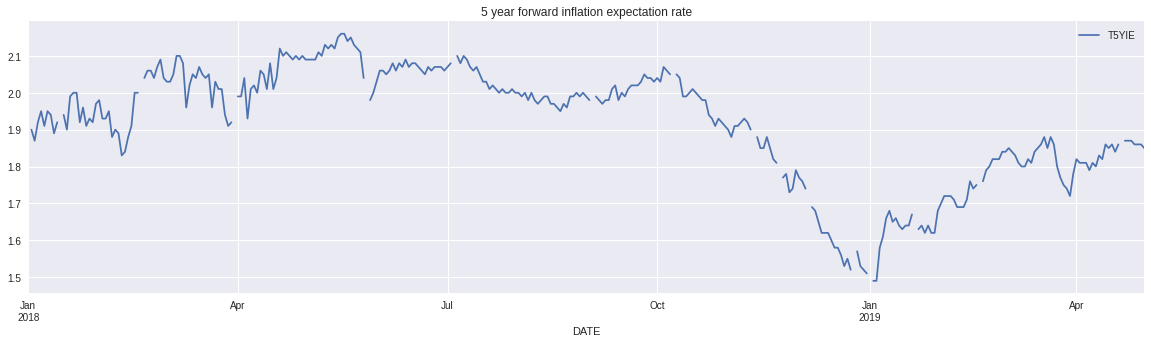

In [2]:
inflation = pdr.DataReader('T5YIE', 'fred', start, end)
inflation.plot(figsize=(20,5), title='5 year forward inflation expectation rate'), plt.show();

# Alpha Vantage
*Repository of free APIs for upto the minute streaming data and 20 years of historical data . APIs are grouped into four categories: 1. Equity 2. Currencies (including cryptocurrencies) 3. Sectors and 4. Technical indicators. Run by a tight-knit community of researchers, engineers, and business professionals. JSON is the default data format with CSV format also supported.*

*Data from this source requires extensive processing before it can used in financial data analysis. The 'Processing Data' workbook focuses on this data source and the steps required to clean the the data. Below are the final lines of code that you could use to get clean data for your analysis.*

*You can find the API documentation here: https://www.alphavantage.co/documentation/* 

---



In [3]:
response = requests.get("https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=demo")
alphadict = json.loads(response.text)
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur = eur.sort_index(ascending = True)
eur.columns = ['open', 'high', 'low', 'close']
eur = eur.astype(float)
eur.head()

,open,high,low,close
2019-12-22,1.1077,1.1086,1.1075,1.1077
2019-12-23,1.1078,1.1096,1.1068,1.1090
2019-12-24,1.1090,1.1094,1.1068,1.1088
2019-12-25,1.1087,1.1102,1.1072,1.1091
2019-12-26,1.1091,1.1109,1.1081,1.1095


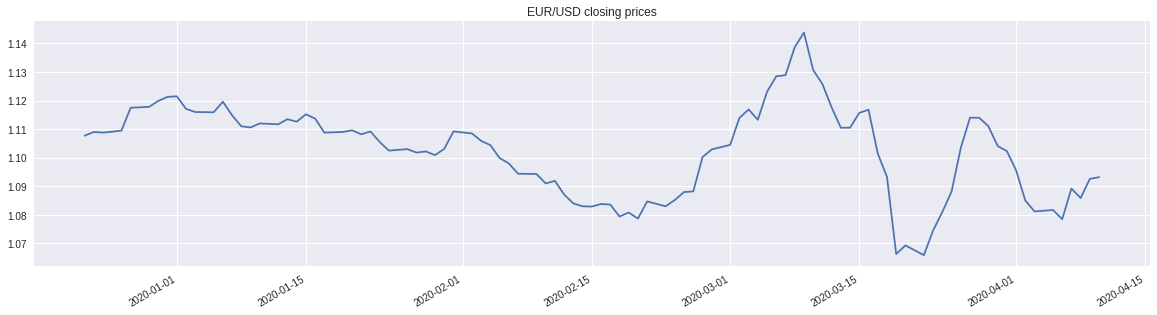

In [4]:
eur['close'].plot(figsize=(20,5), title='EUR/USD closing prices'), plt.show();

# Yahoo Finance
*This is probably the oldest data source of free financial information. It has a vast repository of historical data that cover most traded securities worldwide. There is a pandas datareader that requires a bug fix which is provided below. However, the API is not reliable and will not return data sometimes. You just have to be patient and try again later.*


*https://finance.yahoo.com*

---



In [5]:
import fix_yahoo_finance as yf
yf.pdr_override()
stock = pdr.get_data_yahoo('AMZN', start, end)
stock.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500


# Quandl
*A one stop shop for economic, financial and sentiment data some of it is offered for free and most others for a fee. Quandl sources data from over half a million publishers worldwide. It was  acquired by NASDAQ in 2018. It sources freely available public sources like FRED and private sources of alternative data. Many freely available data, such as historical equity data, are offered for a fee.*

*See API documentation here: https://docs.quandl.com/*

---



In [6]:
!pip install quandl

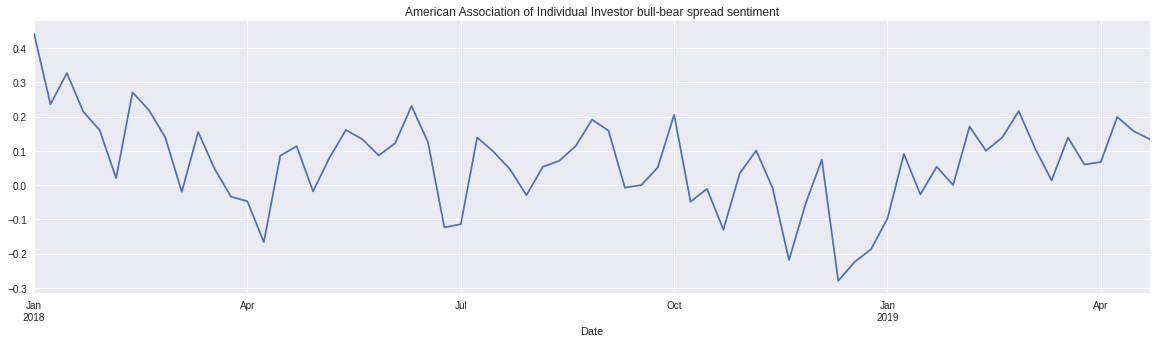

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
2018-01-04,0.597531,0.246914,0.155556,1.000001,0.431950,0.441975,0.382182,0.483619,0.280746,2714.37,2673.61,2713.06
2018-01-11,0.486726,0.262537,0.250737,1.000000,0.456106,0.235989,0.382203,0.483613,0.280794,2759.14,2697.77,2748.23
2018-01-18,0.541133,0.244973,0.213894,1.000000,0.479381,0.327239,0.382198,0.483577,0.280819,2807.54,2736.06,2802.56
2018-01-25,0.454545,0.305195,0.240260,1.000000,0.491267,0.214285,0.382163,0.483521,0.280805,2852.97,2778.38,2837.54
2018-02-01,0.447712,0.264706,0.287582,1.000000,0.501135,0.160130,0.382157,0.483485,0.280830,2872.87,2813.04,2823.81


In [7]:
import quandl
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date= start, end_date= end)
investor_sentiment['Bull-Bear Spread'].plot(figsize=(20,5), title='American Association of Individual Investor bull-bear spread sentiment'), plt.show();
investor_sentiment.head()

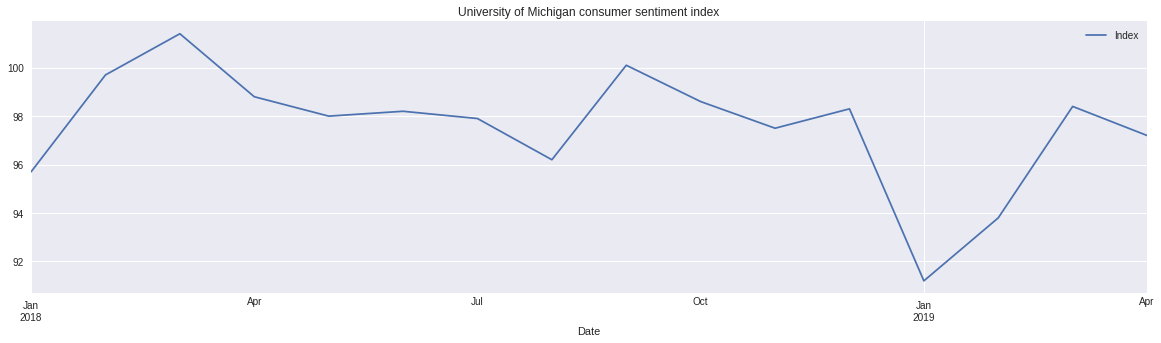

In [9]:
consumer_sentiment = quandl.get('UMICH/SOC1', start_date= start, end_date= end)
consumer_sentiment.plot(figsize=(20,5), title='University of Michigan consumer sentiment index'), plt.show();

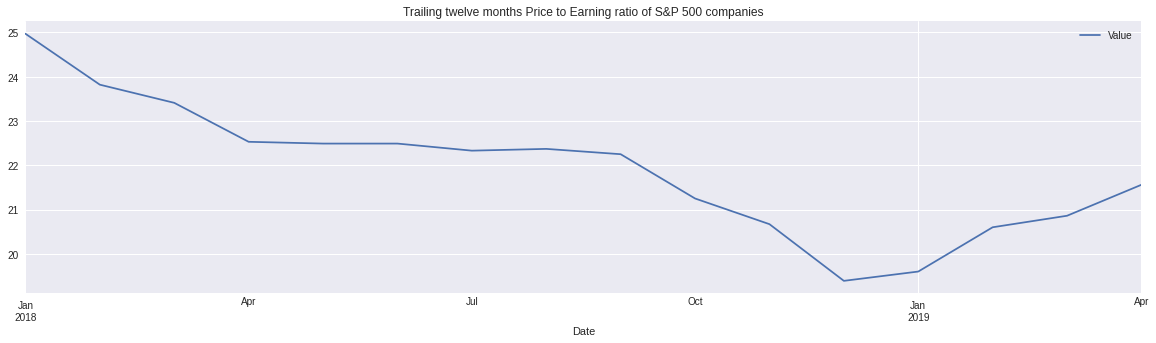

In [10]:
spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date = start, end_date = end)
spx.plot(figsize=(20,5), title='Trailing twelve months Price to Earning ratio of S&P 500 companies'), plt.show();


# IEX Cloud
*The Investors Exchange (IEX) was founded by Brad Katsuyama, hero of the book 'Flash Boys' by Michael Lewis. IEX recently launced IEX Cloud, a new platform provides market and fundamental data for free and for a fee. The default data format is JSON.*

*For more information about the APIs, see: https://iexcloud.io/docs/api/#introduction*

---



In [11]:
response = requests.get("https://sandbox.iexapis.com/stable/stock/aapl/financials?token=Tpk_53e30ef0593440d5855c259602cad185")
jdictionary = json.loads(response.text)
financials = pd.DataFrame(jdictionary['financials'])
financials

,reportDate,fiscalDate,currency,grossProfit,costOfRevenue,operatingRevenue,totalRevenue,operatingIncome,netIncome,researchAndDevelopment,operatingExpense,currentAssets,totalAssets,totalLiabilities,currentCash,currentDebt,shortTermDebt,longTermDebt,totalCash,totalDebt,shareholderEquity,cashChange,cashFlow
0,2019-12-29,2019-12-22,USD,35791623282,59388254860,95271341835,94622009414,25835340331,23067178315,4529507947,67284403526,165376226943,349213263838,261704491532,23005384646,16707366828,17223923987,104345572655,107705939355,118696462663,93030745336,-8925753307,32025585030


# Electronic Data Gathering, Analysis, and Retrieval system (EDGAR)
*Comprehensive repository about companies, both domestic and foreign, who are required by law to file several forms like 10K and 10Q. Third-party filings with respect to these companies, such as tender offers and Schedule 13D filings, are also filed via EDGAR. Not all SEC filings by public companies are available on EDGAR. Companies were phased in to EDGAR filing over a three-year period, ending 6 May 1996. Information is copious and needs to be parsed.*

*For more information go here: https://www.sec.gov/edgar/searchedgar/accessing-edgar-data.htm*

*Edgar API information: https://pypi.org/project/edgar/*



In [12]:
!pip install edgar

In [14]:
from edgar import Company, TXTML
company = Company("Oracle Corp", "0001341439")
doc = company.get_10K()
text = TXTML.parse_full_10K(doc)
print(text)






orcl-10k_20190531.htm





Table of Contents
Index to Financial Statements
 
 
UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
 
FORM 10-K




 

☒

ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended May 31, 2019
OR




 

☐

TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from         to        
Commission File Number: 001-35992
 
Oracle Corporation
(Exact name of registrant as specified in its charter)
 




Delaware

54-2185193



(State or other jurisdiction of
incorporation or organization)

(I.R.S. Employer
Identification No.)



 

 



500 Oracle Parkway

 



Redwood City, California
(Address of principal executive offices)

94065
(Zip Code)


(650) 506-7000
(Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
 




Title of each class

Trading Symbol(s)

Name of e